In [9]:
from __future__ import division, print_function, unicode_literals
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tkinter import messagebox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn import metrics
from numpy import *
import seaborn as sns


In [2]:
df = pd.read_csv("data.csv",delimiter=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   condition    150 non-null    int64  
 1   sqft_living  150 non-null    int64  
 2   floors       150 non-null    float64
 3   bedrooms     150 non-null    int64  
 4   price        150 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 6.0 KB


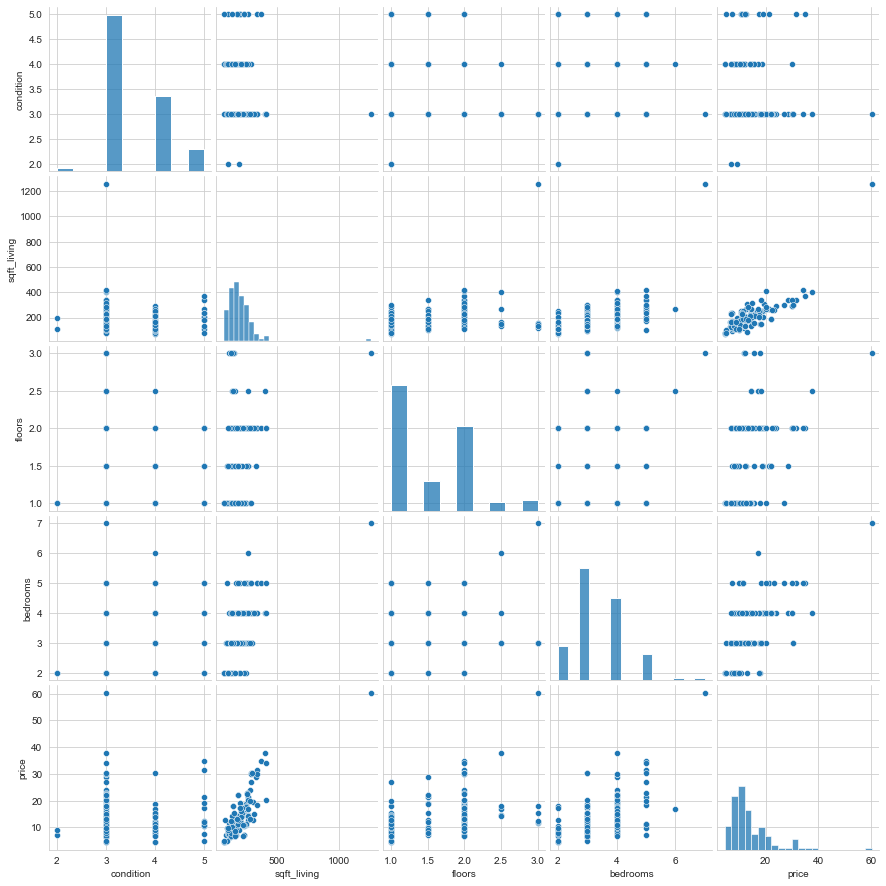

In [10]:
sns.pairplot(df)

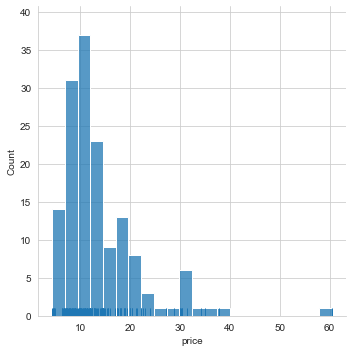

In [7]:
sns.set_style("whitegrid")
sns.displot(df['price'], kde = False, rug = "True")

<AxesSubplot:>

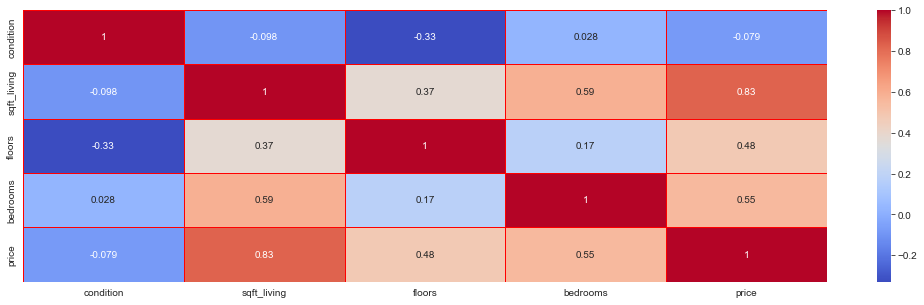

In [6]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [12]:
X = df[['condition', 'sqft_living','floors','bedrooms']].values.reshape(-1,4)
Y = df['price']

In [14]:
one = np.ones((X.shape[0], 1), dtype=int)
Xbar = np.concatenate((one, X), axis = 1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)
print ('w=',w)
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
w_3 = w[3]
w_4 = w[4]
print("Phương trình hồi quy tuyến tính: y =%.4f"%w_1,"*x1+%.4f"%w_2,"*x2+%.4f"%w_3,"*x3+%.4f"%w_4,"*x4+%.4f"%w_0)




w= [-5.81151239  0.67754958  0.04684603  2.99123954  0.92319482]
Phương trình hồi quy tuyến tính: y =0.6775 *x1+0.0468 *x2+2.9912 *x3+0.9232 *x4+-5.8115


In [16]:
model = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, random_state=0)
model.fit(xtrain, ytrain)##xay dung mo hinh hoi quy

LinearRegression()

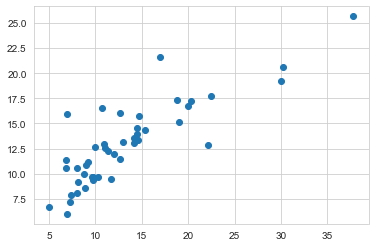

In [17]:
pred = model.predict(xtest)
#vẽ biểu đồ giữa kết quả ban đầu vs kết quả dự đoán
plt.scatter( ytest,pred)
plt.show()

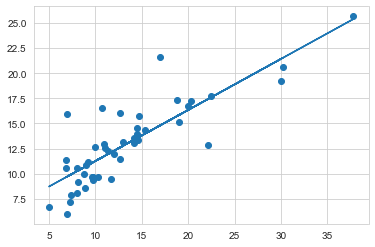

In [26]:
slope, intercept, r, p, std_err = stats.linregress(ytest,pred)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, ytest))

plt.scatter(ytest,pred)
plt.plot(ytest, mymodel)
plt.show()

In [22]:
r_sq = model.score(xtest, ytest)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6462676453124926


In [14]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred)))
metrics.explained_variance_score(ytest, pred)

RMSE: 4.021174994203087


0.6499559168770253

In [45]:
master= tk.Tk()
master.title("Bài tập lớn")
master.geometry("600x400",)
tk.Label(master, text="Nhập các thông tin để dự đoán: ").grid(row=0, column=0)
tk.Label(master, text="Điều kiện ở(1-5*)").grid(row=1, column=0)
tk.Label(master, text="Diện tích").grid(row=2, column=0)
tk.Label(master, text="Số tầng").grid(row=3, column=0)
tk.Label(master, text="Số phòng ngủ").grid(row=4, column=0)
tk.Label(master, text="Kết quả dự đoán giá nhà (Tỷ) : ").grid(row=5, column=0)
e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e5 = tk.Entry(master,state='disabled')
e1.grid(row=1, column=1,pady=(13,5))
e2.grid(row=2, column=1,pady=(0,5))
e3.grid(row=3, column=1,pady=(0,5))
e4.grid(row=4, column=1,pady=(0,5))
e5.grid(row=5, column=1,pady=(0,5))
tk.Label(master, text="Chọn chức năng :").grid(row=6,column=0)


def duDoan():
    
    check1=e1.get()
    check2=e2.get()
    check3=e3.get()
    check4=e4.get()
    check5=e5.get()
    if(check1 == "" or check2 == "" or check3== "" or check4== "" or float(check1) <=0 or float(check2) <=0 or float(check3) <=0 or float(check4) <=0):
        messagebox.showerror("Error", "Vui lòng nhập đúng số ")
    else:
        bien1 = float(check1)
        bien2 = float(check2)
        bien3 = float(check3)
        bien4 = float(check4)
        kqDuDoan = model.predict([[bien1,bien2,bien3,bien4]])
        e5.configure(state=tk.NORMAL)
        if(check5 !=" "):
            e5.delete(0,'end')
            e5.insert(0,round(float(kqDuDoan),1))
        else:
            e5.insert(0,round(float(kqDuDoan),1))
   
tk.Button(master, 
          text='Dự đoán', 
          command=duDoan).place(x=150,y=175)

def Close():
    master.destroy()
tk.Button(master, 
          text='Thoát', 
          command=Close).place(x=410,y=175)
def pthoiquy():
    a=model.coef_#đánh giá sự tác động của các bến độc lập tới kết quả dự đoán
    b=model.intercept_
    messagebox.showinfo( "Phương trình hồi quy","PT hồi quy có dạng: y = "+str(round(a[0],2))+" * x1 + "
    +str(round(a[1],2))+" * x2 + "+str(round(a[2],2))+" * x3 +"+str(round(a[3],2))+" * x4 +"+str(round(b,2)))
tk.Button(master, 
          text='PT hồi quy', 
          command=pthoiquy).place(x=240,y=175)
def reset():
    check1=e1.get()
    check2=e2.get()
    check3=e3.get()
    check4=e4.get()
    check5=e5.get()
    if(check1 == "" and check2 == "" and check3== "" and check4== "" and check5== ""):
        messagebox.showinfo("reset","Các ô đã được reset")
    else:
        e1.delete(0,'end')
        e2.delete(0,'end')
        e3.delete(0,'end')
        e4.delete(0,'end')
        e5.delete(0,'end')
        e5.configure(state=tk.DISABLED)
         
tk.Button(master, 
          text='Reset', 
          command=reset).place(x=340,y=175)   

master.mainloop()
